The dataset is a sentiment analysis for classifying fake and real news ,given a set of headings like text,title,subject,date .
This notebook gives a solution to identify fake and real news of a large data(set) with highest possible accuracy . the vocabulary of the dataset is over 150000 words, which is tried to reduce by using stop words and stemmer functions.comments are added wherever thought necessary, detailed explaination in the readme file 

In [14]:
#import all the essential libraries

import numpy as np 
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer  # for stemming

In [2]:
#import the csv into true and false

true = pd.read_csv('/kaggle/input/fake-and-real-news-dataset/True.csv')
fake = pd.read_csv('/kaggle/input/fake-and-real-news-dataset/Fake.csv')

In [3]:
#true.head shows the first five rows ,so the colum details can be studied,same is done with false (false.head)
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
#add a column called category that assigns '0' for fake news and '1' for true news
true['category'] = 1
fake['category'] = 0

In [5]:
#true.news to check if the category column is added
true.head()

,title,text,subject,date,category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [6]:
#concatenate true and false into dataframe 'df'
df = pd.concat([true,fake])

In [7]:
#display df
df


,title,text,subject,date,category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [8]:
#set category column as the target and convert to a numpy array 
target = df['category'].values
target = np.array(target, dtype='int64')

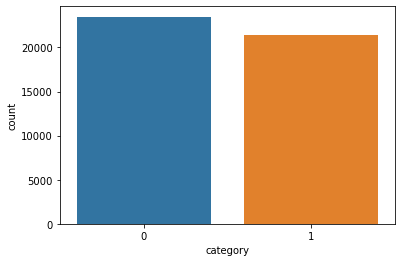

In [9]:
#import seaborn for visualising the data 
import seaborn as sns
sns.countplot(x='category',data=df)

The data is fairly distributed b/w true and false , thus contributing to a non-biased model making

[Text(0, 0, 'politicsNews'),
 Text(0, 0, 'worldnews'),
 Text(0, 0, 'News'),
 Text(0, 0, 'politics'),
 Text(0, 0, 'Government News'),
 Text(0, 0, 'left-news'),
 Text(0, 0, 'US_News'),
 Text(0, 0, 'Middle-east')]

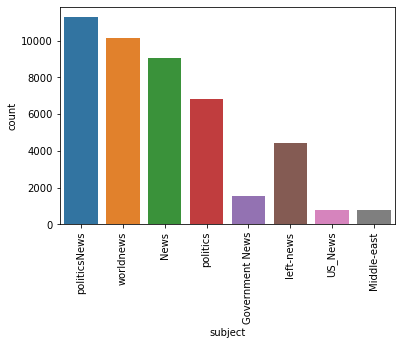

In [10]:
#observe which subjects/topics contribute to most news in the data
ax=sns.countplot(x='subject',data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


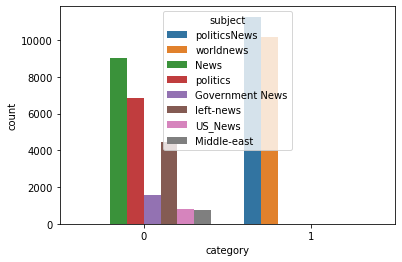

In [11]:
# we study which subjects/topics contribute to most fake and true news
sns.countplot(x='category',hue='subject',data=df)

***procedure to clean the dataset :** 
* Create a function clean_word that replaces punctuation with blank spaces, and appends only numbers and alphabets to 'new', excluding stopwords, and perform steeming and append the words to'new'.
* add all the columns to 'text' and drop the unnecessary columns
* find the largest sentence and pad rest of the sentences with zeros to match the largest sentence's length 
*  feed it into a vector which can be trained and tested for a model

In [15]:
#import stopwords, porter stemmer(for stemming)

STOPWORDS = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_word(word_list):
    global STOPWORDS
    global stemmer
    new = []
    for word in word_list:
        word = word.replace('.', '')
        word = word.replace(',', '')
        word = word.replace(';', '')
        word = word.lower()
        if (word.isalpha() or word.isdigit()) and word not in STOPWORDS:   
            new.append(stemmer.stem(word.strip()))
    return new

In [16]:
# add columns 'text', 'title' and 'subject' to text ,and leave spaces b/w so as to easily feed into the model
df['text'] = df['text'] + " " + df['title'] + " " + df['subject']
df = df.drop(columns=['title','subject','date']) #drop columns that might not contribute to the prediction of target

In [17]:
from sklearn.preprocessing import LabelEncoder

text = df['text'].values

# Tokenize each sentence 
text_arr = [row.split(' ') for row in text]

In [18]:

vocab = []
clean_text_array = []
for row in text_arr:
    clean_row = clean_word(row)
    clean_text_array.append(clean_row)
    vocab.extend(clean_row)

In [19]:
#set and list all the words to vocabulary and print the length(to get a count of the number of words)
vocabulary = list(set(vocab))
len(vocabulary)

130590

In [20]:

vectorizer = LabelEncoder()
vectorizer.fit(vocabulary)
print(1)

# Create token vector using Label Encoder fit on entire vocabulary
token_vector = []
i=0

# declare max_words to keep count of the longest sentence vectorized
# we need this to pad every other vector to same length as longest vector

max_words = 0 
for row in clean_text_array:
    encoded = vectorizer.transform(row).tolist()
    size = len(encoded)
    if size>max_words: 
        max_words=size
    token_vector.append(encoded)

1


In [21]:
max_words #print max_words

4676

In [23]:
# pad each sentence with zeros to the length of the longest sentence
padded = []
for row in token_vector:
    r = np.pad(row, (0, max_words-len(row)), 'constant')
    padded.append(r)

In [24]:
# all padded sentences to example vector

ex_vector = np.array(padded)

In [25]:
# split train and test data into 80:20, data=ex_vector, target=target

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(ex_vector,target, test_size=0.2)

In [26]:
import tensorflow as tf

split the data into batches and shuffle 

In [27]:

train_dataset = tf.data.Dataset.from_tensor_slices((xtrain, ytrain))
test_dataset = tf.data.Dataset.from_tensor_slices((xtest, ytest))

In [28]:

BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 100

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [29]:
type(train_dataset)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [30]:
from tensorflow import keras  


In [31]:
embedding_dim=16 

# defining the sequential model with an Embedding layer
# Add a Global Average Pooling 1D layer to flattent the matrix into vector

model = keras.models.Sequential([
  keras.layers.Embedding(130590, embedding_dim), #130590 as input based on vocabulary
  keras.layers.GlobalAveragePooling1D(),
  keras.layers.Dense(32, activation='relu'),
  keras.layers.Dense(1, activation='sigmoid')
])


In [32]:
#complie the model
model.compile(optimizer=keras.optimizers.Adam(0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [33]:
epochs=5                  #five iterations
history = model.fit(train_dataset, epochs=epochs, validation_data=test_dataset, verbose=2)

Train for 562 steps, validate for 141 steps
Epoch 1/5
562/562 - 25s - loss: 0.6484 - accuracy: 0.6334 - val_loss: 0.4676 - val_accuracy: 0.9026
Epoch 2/5
562/562 - 22s - loss: 0.2764 - accuracy: 0.9411 - val_loss: 0.1889 - val_accuracy: 0.9507
Epoch 3/5
562/562 - 22s - loss: 0.1463 - accuracy: 0.9668 - val_loss: 0.1229 - val_accuracy: 0.9731
Epoch 4/5
562/562 - 23s - loss: 0.1031 - accuracy: 0.9770 - val_loss: 0.0951 - val_accuracy: 0.9757
Epoch 5/5
562/562 - 22s - loss: 0.0783 - accuracy: 0.9827 - val_loss: 0.0815 - val_accuracy: 0.9782


In [35]:
print("Accuracy of the model on Training Data is - " , model.evaluate(xtrain,ytrain)[1]*100)
print("Accuracy of the model on Testing Data is - " , model.evaluate(xtest,ytest)[1]*100)

35918/35918 [==============================] - 5s 152us/sample - loss: 0.0721 - accuracy: 0.9842
Accuracy of the model on Training Data is -  98.41583371162415
8980/8980 [==============================] - 1s 144us/sample - loss: 0.0814 - accuracy: 0.9782
Accuracy of the model on Testing Data is -  97.81737327575684


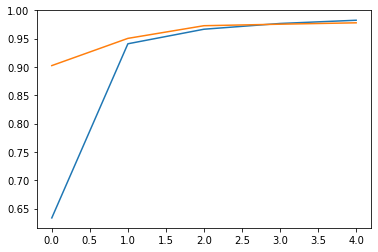

In [36]:
# Plot Accuracy
plt.plot(range(epochs), history.history['accuracy'])
plt.plot(range(epochs), history.history['val_accuracy'])


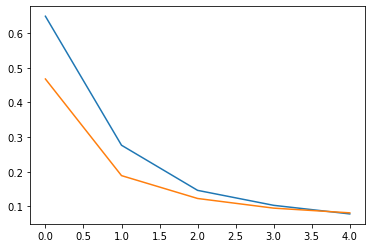

In [37]:
# Plot Loss
plt.plot(range(epochs), history.history['loss'])
plt.plot(range(epochs), history.history['val_loss'])

In [38]:
pred = model.predict_classes(xtest)

In [39]:
cm = confusion_matrix(ytest,pred)
cm

array([[4524,  139],
       [  57, 4260]])

In [40]:
cm = pd.DataFrame(cm , index = ['Fake','Not Fake'] , columns = ['Fake','Not Fake'])

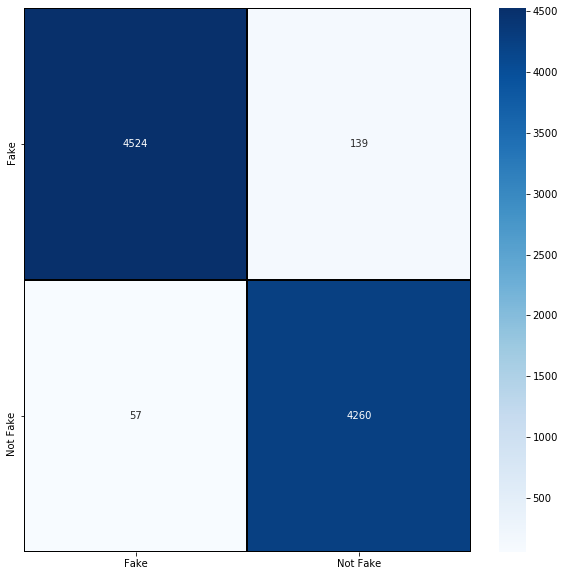

In [41]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Fake','Not Fake'] , yticklabels = ['Fake','Not Fake'])


In [ ]:
kkkkkkkjjjjjj

In [ ]:
just typing random stuff so the notebook doesnt collapse due to idleness
1 2 3 4 5 6 lkdaldlkaldkakdkdfffff
lkslkslakslksal
dlllllllllhhdkdkqhkdkhdqdqk hdqdhkdhnnnnn
sjffffffffffff
lsljslslxsxsaxkjd
kalkxslxljldddd
kLSLlsssmxxxx
cacaa